In [1]:
year=2019
month=7

In [2]:
import pandas as pd
import sys
sys.path.append('../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
cities = "('北京','上海','深圳','杭州','广州','南京','成都','东莞','西安','武汉','天津','长沙','宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨')"
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month} and city in {cities}", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}

translate_dict={}


# 程序员工资

In [8]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,17638,3750,15000,45000,21211,10.71%
1,上海,16631,5250,15000,37500,36182,18.26%
8,深圳,16354,5500,15000,37500,30665,15.48%
2,杭州,15078,3250,13000,35000,10975,5.54%
7,南京,13670,4000,12500,30000,11409,5.76%
3,广州,13523,3750,12500,33423,22563,11.39%
5,成都,12322,3500,11500,31250,9240,4.66%
14,东莞,11897,3750,12000,25000,2234,1.13%
12,武汉,11825,4500,11000,26000,11139,5.62%
4,西安,11153,3906,10500,22500,5655,2.85%


In [9]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row[0]}招收{career}{row[5]}人。{year}年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [10]:
describe(data_city,'程序员')

2019年7月北京招收程序员21211人。2019年7月北京程序员平均工资17638元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年7月上海招收程序员36182人。2019年7月上海程序员平均工资16631元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年7月深圳招收程序员30665人。2019年7月深圳程序员平均工资16354元，工资中位数15000元，其中95%的人的工资介于5500元到37500元。

2019年7月杭州招收程序员10975人。2019年7月杭州程序员平均工资15078元，工资中位数13000元，其中95%的人的工资介于3250元到35000元。

2019年7月南京招收程序员11409人。2019年7月南京程序员平均工资13670元，工资中位数12500元，其中95%的人的工资介于4000元到30000元。

2019年7月广州招收程序员22563人。2019年7月广州程序员平均工资13523元，工资中位数12500元，其中95%的人的工资介于3750元到33423元。

2019年7月成都招收程序员9240人。2019年7月成都程序员平均工资12322元，工资中位数11500元，其中95%的人的工资介于3500元到31250元。

2019年7月东莞招收程序员2234人。2019年7月东莞程序员平均工资11897元，工资中位数12000元，其中95%的人的工资介于3750元到25000元。

2019年7月武汉招收程序员11139人。2019年7月武汉程序员平均工资11825元，工资中位数11000元，其中95%的人的工资介于4500元到26000元。

2019年7月西安招收程序员5655人。2019年7月西安程序员平均工资11153元，工资中位数10500元，其中95%的人的工资介于3906元到22500元。

2019年7月长沙招收程序员4597人。2019年7月长沙程序员平均工资11031元，工资中位数10499元，其中95%的人的工资介于4000元到24000元。

2019年7月大连招收程序员6943人。2019年7月大连程序员平均工资10786元，工资中位数9000元，其中95%的人的工资介于2500元到30000元。

2019年7月宁波招

In [11]:
data_location = pd.read_csv('city_locations.csv')
data_location=data_location.set_index('city')

In [12]:
from mpl_toolkits.basemap import Basemap

In [13]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        city=row[0]
        
        longitude = data_location.loc[city,'longitude']
        latitude = data_location.loc[city,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if city == '杭州':
            x=x-400000
            y=y+10000
        elif city=='广州':
            x=x-400000
            y=y+10000
        elif city=='合肥':
            x=x-300000
            y=y+10000
        elif city=='深圳':
            y=y-100000
        elif city=='南京':
            x=x-100000
        elif city=='天津':
            y=y-50000
        elif city=='上海':
            x=x+50000
        elif city=='武汉':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(city, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(city, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


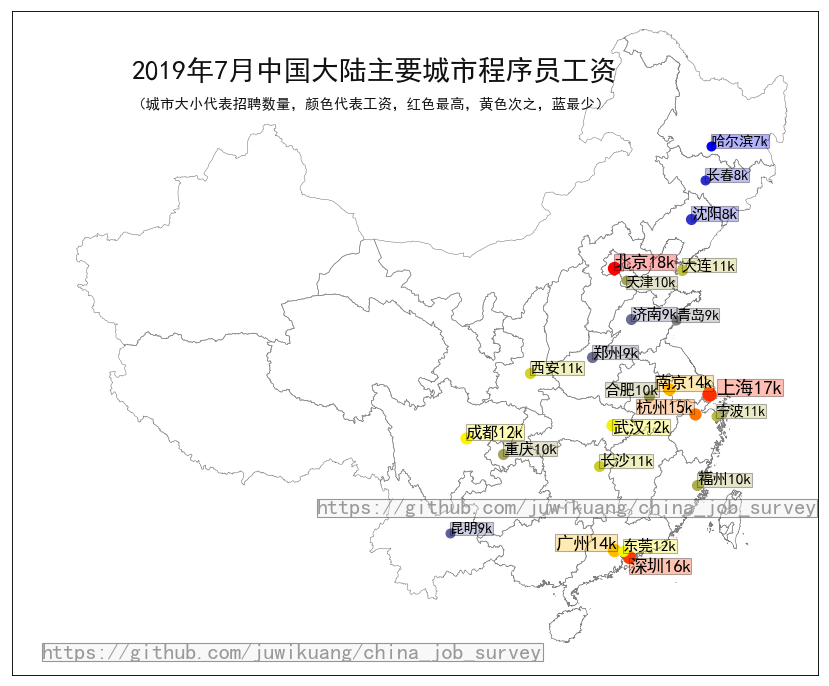

In [14]:
draw_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 算法工程师

In [15]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,23923,5250,22500,50000,2543,15.33%
1,上海,22994,5242,22500,45833,3494,21.06%
7,深圳,22444,6250,21000,45000,2693,16.24%
4,杭州,19964,3750,17500,45821,1223,7.37%
3,广州,19378,4500,17916,45000,1517,9.15%
10,南京,18252,7358,17500,35000,1049,6.32%
9,成都,15938,5250,15000,31250,825,4.97%
11,武汉,15146,3854,15000,27500,925,5.58%
14,合肥,14764,2677,13500,32700,252,1.52%
16,宁波,14685,6500,12500,27875,58,0.35%


In [16]:
describe(data_city_algorithm,'算法工程师')

2019年7月北京招收算法工程师2543人。2019年7月北京算法工程师平均工资23923元，工资中位数22500元，其中95%的人的工资介于5250元到50000元。

2019年7月上海招收算法工程师3494人。2019年7月上海算法工程师平均工资22994元，工资中位数22500元，其中95%的人的工资介于5242元到45833元。

2019年7月深圳招收算法工程师2693人。2019年7月深圳算法工程师平均工资22444元，工资中位数21000元，其中95%的人的工资介于6250元到45000元。

2019年7月杭州招收算法工程师1223人。2019年7月杭州算法工程师平均工资19964元，工资中位数17500元，其中95%的人的工资介于3750元到45821元。

2019年7月广州招收算法工程师1517人。2019年7月广州算法工程师平均工资19378元，工资中位数17916元，其中95%的人的工资介于4500元到45000元。

2019年7月南京招收算法工程师1049人。2019年7月南京算法工程师平均工资18252元，工资中位数17500元，其中95%的人的工资介于7358元到35000元。

2019年7月成都招收算法工程师825人。2019年7月成都算法工程师平均工资15938元，工资中位数15000元，其中95%的人的工资介于5250元到31250元。

2019年7月武汉招收算法工程师925人。2019年7月武汉算法工程师平均工资15146元，工资中位数15000元，其中95%的人的工资介于3854元到27500元。

2019年7月合肥招收算法工程师252人。2019年7月合肥算法工程师平均工资14764元，工资中位数13500元，其中95%的人的工资介于2677元到32700元。

2019年7月宁波招收算法工程师58人。2019年7月宁波算法工程师平均工资14685元，工资中位数12500元，其中95%的人的工资介于6500元到27875元。

2019年7月东莞招收算法工程师196人。2019年7月东莞算法工程师平均工资14632元，工资中位数12500元，其中95%的人的工资介于5080元到36000元。

2019年7月长沙招收算法工程师286人。2019年7月长沙算法工程师平均工资14444元，工资中位数13500元，其中

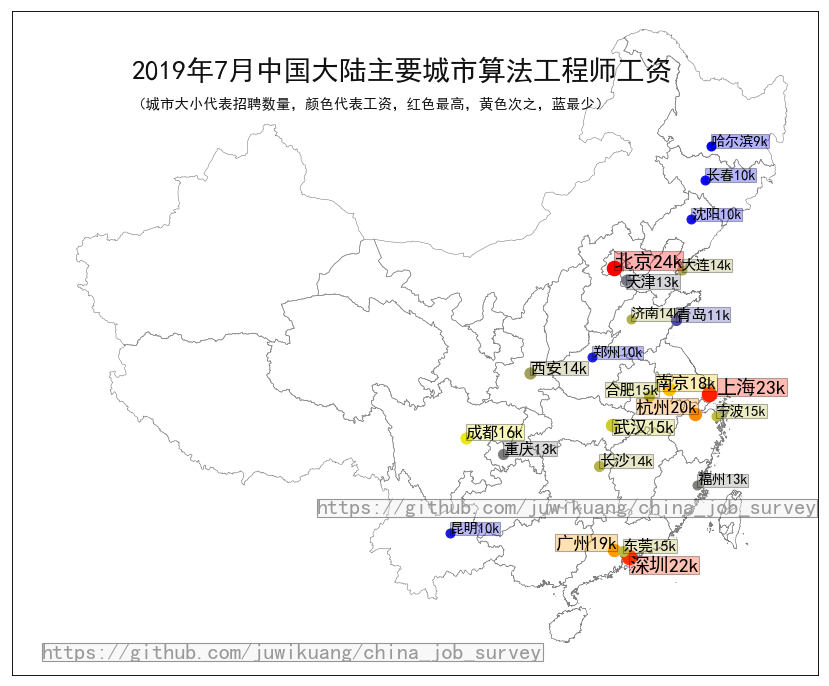

In [17]:
draw_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [18]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
6,北京,30972,4500,30000,60000,1069,15.02%
4,深圳,27863,7696,27500,55208,970,13.63%
5,上海,25784,9000,24000,50000,1587,22.30%
3,杭州,23927,4561,24000,45021,419,5.89%
20,天津,22686,5219,11500,60000,55,0.77%
1,南京,20979,5450,20000,37500,317,4.45%
2,广州,20479,5250,20000,41666,1031,14.48%
8,成都,19996,5576,18125,44912,227,3.19%
0,大连,19591,9000,17500,32868,127,1.78%
9,东莞,19075,7000,20000,33000,94,1.32%


In [19]:
describe(data_city_architect,'系统架构师')

2019年7月北京招收系统架构师1069人。2019年7月北京系统架构师平均工资30972元，工资中位数30000元，其中95%的人的工资介于4500元到60000元。

2019年7月深圳招收系统架构师970人。2019年7月深圳系统架构师平均工资27863元，工资中位数27500元，其中95%的人的工资介于7696元到55208元。

2019年7月上海招收系统架构师1587人。2019年7月上海系统架构师平均工资25784元，工资中位数24000元，其中95%的人的工资介于9000元到50000元。

2019年7月杭州招收系统架构师419人。2019年7月杭州系统架构师平均工资23927元，工资中位数24000元，其中95%的人的工资介于4561元到45021元。

2019年7月天津招收系统架构师55人。2019年7月天津系统架构师平均工资22686元，工资中位数11500元，其中95%的人的工资介于5219元到60000元。

2019年7月南京招收系统架构师317人。2019年7月南京系统架构师平均工资20979元，工资中位数20000元，其中95%的人的工资介于5450元到37500元。

2019年7月广州招收系统架构师1031人。2019年7月广州系统架构师平均工资20479元，工资中位数20000元，其中95%的人的工资介于5250元到41666元。

2019年7月成都招收系统架构师227人。2019年7月成都系统架构师平均工资19996元，工资中位数18125元，其中95%的人的工资介于5576元到44912元。

2019年7月大连招收系统架构师127人。2019年7月大连系统架构师平均工资19591元，工资中位数17500元，其中95%的人的工资介于9000元到32868元。

2019年7月东莞招收系统架构师94人。2019年7月东莞系统架构师平均工资19075元，工资中位数20000元，其中95%的人的工资介于7000元到33000元。

2019年7月西安招收系统架构师179人。2019年7月西安系统架构师平均工资17254元，工资中位数17500元，其中95%的人的工资介于8190元到40063元。

2019年7月武汉招收系统架构师314人。2019年7月武汉系统架构师平均工资16964元，工资中位数15917元，其中95%的

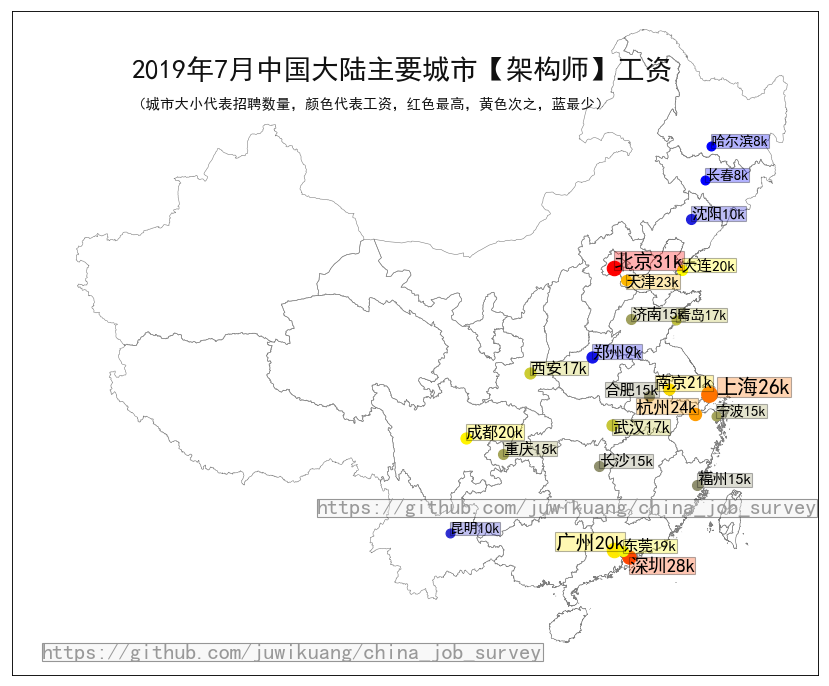

In [20]:
draw_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [21]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,12500,12500,12500,12500,2,7.14%
4,杭州,12000,11500,12000,12500,2,7.14%
6,长春,11500,11500,11500,11500,2,7.14%
1,广州,11375,7000,11375,14000,8,28.57%
5,上海,9800,8000,9800,12500,5,17.86%
3,武汉,9000,9000,9000,9000,1,3.57%
7,南京,9000,9000,9000,9000,3,10.71%
2,深圳,7500,7500,7500,7500,5,17.86%


In [22]:
describe(data_bio,'生物信息工程师')

2019年7月北京招收生物信息工程师2人。2019年7月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年7月杭州招收生物信息工程师2人。2019年7月杭州生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年7月长春招收生物信息工程师2人。2019年7月长春生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年7月广州招收生物信息工程师8人。2019年7月广州生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2019年7月上海招收生物信息工程师5人。2019年7月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年7月武汉招收生物信息工程师1人。2019年7月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年7月南京招收生物信息工程师3人。2019年7月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年7月深圳招收生物信息工程师5人。2019年7月深圳生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。



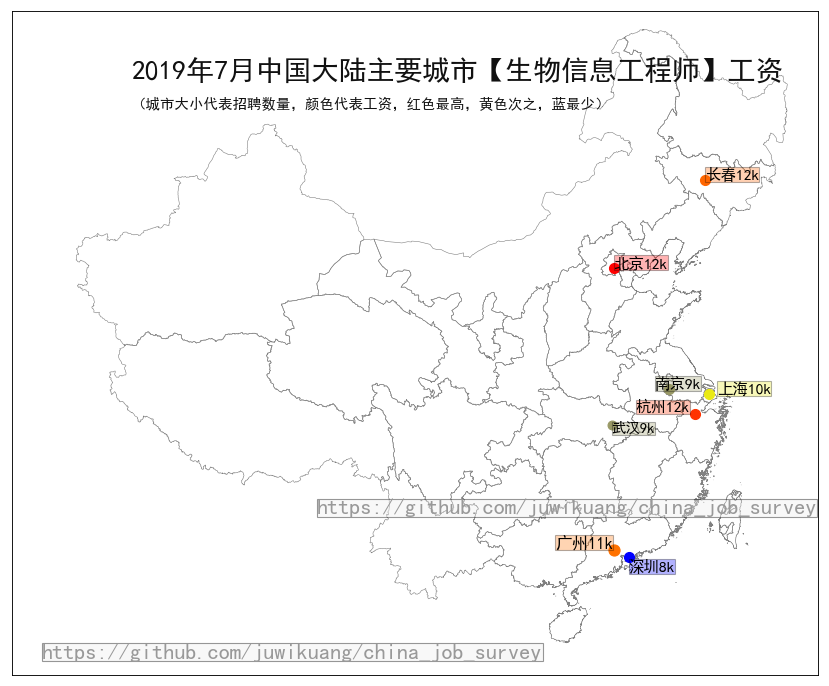

In [23]:
draw_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [24]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider.head_count>10]
data_spider.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
6,北京,16662,1750,12500,37146,37,11.82%
1,广州,15513,2500,11786,37500,39,12.46%
12,南京,14844,12500,12500,20000,16,5.11%
5,杭州,14091,11500,12333,22500,11,3.51%
3,上海,13727,5022,12500,31531,77,24.60%
2,深圳,10773,5250,10499,22200,66,21.09%
0,武汉,10449,8000,10687,12500,13,4.15%
7,长沙,10214,9000,10125,11500,14,4.47%
8,郑州,6083,5000,5194,9000,12,3.83%
9,成都,5531,2250,5531,11500,16,5.11%


In [25]:
describe(data_spider, '爬虫工程师')

2019年7月北京招收爬虫工程师37人。2019年7月北京爬虫工程师平均工资16662元，工资中位数12500元，其中95%的人的工资介于1750元到37146元。

2019年7月广州招收爬虫工程师39人。2019年7月广州爬虫工程师平均工资15513元，工资中位数11786元，其中95%的人的工资介于2500元到37500元。

2019年7月南京招收爬虫工程师16人。2019年7月南京爬虫工程师平均工资14844元，工资中位数12500元，其中95%的人的工资介于12500元到20000元。

2019年7月杭州招收爬虫工程师11人。2019年7月杭州爬虫工程师平均工资14091元，工资中位数12333元，其中95%的人的工资介于11500元到22500元。

2019年7月上海招收爬虫工程师77人。2019年7月上海爬虫工程师平均工资13727元，工资中位数12500元，其中95%的人的工资介于5022元到31531元。

2019年7月深圳招收爬虫工程师66人。2019年7月深圳爬虫工程师平均工资10773元，工资中位数10499元，其中95%的人的工资介于5250元到22200元。

2019年7月武汉招收爬虫工程师13人。2019年7月武汉爬虫工程师平均工资10449元，工资中位数10687元，其中95%的人的工资介于8000元到12500元。

2019年7月长沙招收爬虫工程师14人。2019年7月长沙爬虫工程师平均工资10214元，工资中位数10125元，其中95%的人的工资介于9000元到11500元。

2019年7月郑州招收爬虫工程师12人。2019年7月郑州爬虫工程师平均工资6083元，工资中位数5194元，其中95%的人的工资介于5000元到9000元。

2019年7月成都招收爬虫工程师16人。2019年7月成都爬虫工程师平均工资5531元，工资中位数5531元，其中95%的人的工资介于2250元到11500元。



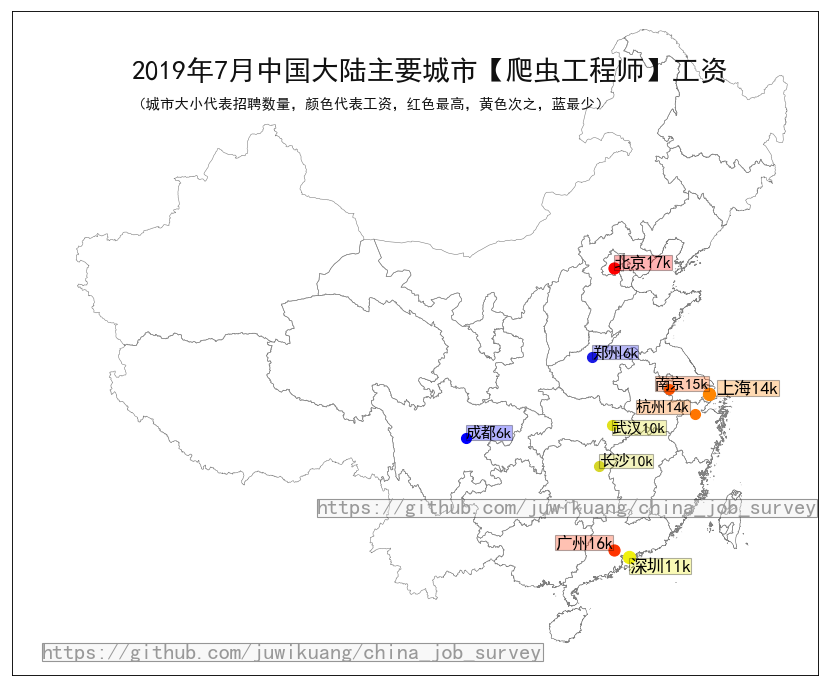

In [26]:
draw_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [27]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,上海,16929,5250,15000,37500,15920,17.32%
6,深圳,16509,7000,15000,37500,13352,14.52%
4,北京,16403,4500,14000,37500,10107,10.99%
0,杭州,15386,3000,14000,35000,5426,5.90%
1,广州,13663,3750,12500,30000,10814,11.76%
5,南京,13244,4250,12500,27399,6049,6.58%
16,东莞,12154,3481,12500,24978,854,0.93%
3,成都,11795,2500,11500,27500,3924,4.27%
10,武汉,11578,4881,10500,26000,4384,4.77%
7,大连,11488,2500,9500,30000,4006,4.36%


In [28]:
describe(data_java, 'Java程序员')

2019年7月上海招收Java程序员15920人。2019年7月上海Java程序员平均工资16929元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年7月深圳招收Java程序员13352人。2019年7月深圳Java程序员平均工资16509元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2019年7月北京招收Java程序员10107人。2019年7月北京Java程序员平均工资16403元，工资中位数14000元，其中95%的人的工资介于4500元到37500元。

2019年7月杭州招收Java程序员5426人。2019年7月杭州Java程序员平均工资15386元，工资中位数14000元，其中95%的人的工资介于3000元到35000元。

2019年7月广州招收Java程序员10814人。2019年7月广州Java程序员平均工资13663元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年7月南京招收Java程序员6049人。2019年7月南京Java程序员平均工资13244元，工资中位数12500元，其中95%的人的工资介于4250元到27399元。

2019年7月东莞招收Java程序员854人。2019年7月东莞Java程序员平均工资12154元，工资中位数12500元，其中95%的人的工资介于3481元到24978元。

2019年7月成都招收Java程序员3924人。2019年7月成都Java程序员平均工资11795元，工资中位数11500元，其中95%的人的工资介于2500元到27500元。

2019年7月武汉招收Java程序员4384人。2019年7月武汉Java程序员平均工资11578元，工资中位数10500元，其中95%的人的工资介于4881元到26000元。

2019年7月大连招收Java程序员4006人。2019年7月大连Java程序员平均工资11488元，工资中位数9500元，其中95%的人的工资介于2500元到30000元。

2019年7月西安招收Java程序员2603人。2019年7月西安Java程序员平均工资11063元，工资中位数11000元，其中95%的人的工资介于3154元到22500元。

2019年7月宁

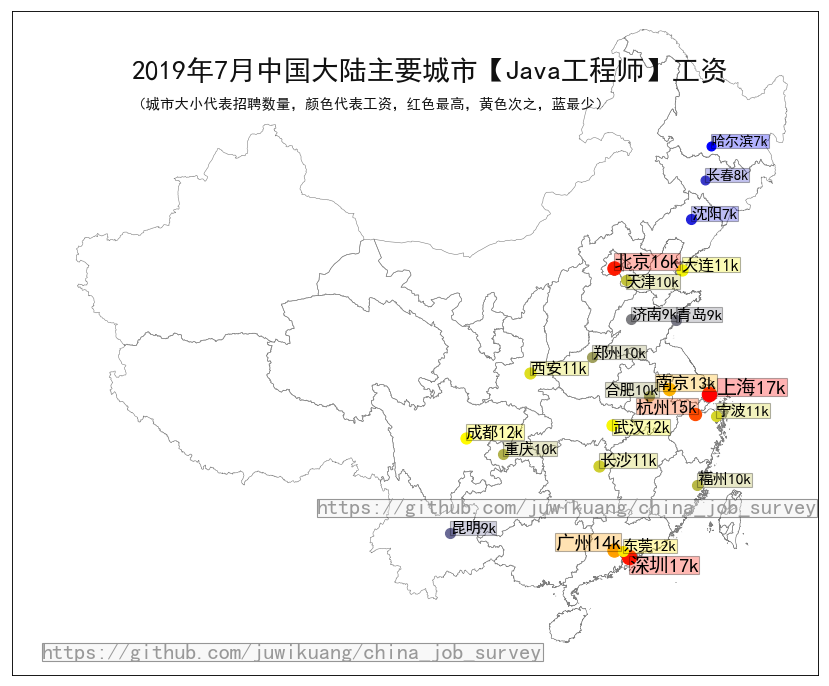

In [29]:
draw_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [30]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
8,北京,22370,4500,20000,45833,3565,16.11%
4,上海,21135,5250,20000,45833,5043,22.79%
5,深圳,20904,6250,17500,45000,3034,13.71%
2,杭州,17801,3433,15000,45000,1353,6.12%
0,广州,17114,4000,15000,41885,2259,10.21%
7,南京,16663,4350,16000,35000,1580,7.14%
9,成都,16321,4071,15000,38246,1057,4.78%
1,武汉,14735,4827,14000,30000,1121,5.07%
12,大连,14458,2500,12500,50000,431,1.95%
10,天津,13080,5996,11600,25844,133,0.60%


In [31]:
describe(data_python, 'Python程序员')

2019年7月北京招收Python程序员3565人。2019年7月北京Python程序员平均工资22370元，工资中位数20000元，其中95%的人的工资介于4500元到45833元。

2019年7月上海招收Python程序员5043人。2019年7月上海Python程序员平均工资21135元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。

2019年7月深圳招收Python程序员3034人。2019年7月深圳Python程序员平均工资20904元，工资中位数17500元，其中95%的人的工资介于6250元到45000元。

2019年7月杭州招收Python程序员1353人。2019年7月杭州Python程序员平均工资17801元，工资中位数15000元，其中95%的人的工资介于3433元到45000元。

2019年7月广州招收Python程序员2259人。2019年7月广州Python程序员平均工资17114元，工资中位数15000元，其中95%的人的工资介于4000元到41885元。

2019年7月南京招收Python程序员1580人。2019年7月南京Python程序员平均工资16663元，工资中位数16000元，其中95%的人的工资介于4350元到35000元。

2019年7月成都招收Python程序员1057人。2019年7月成都Python程序员平均工资16321元，工资中位数15000元，其中95%的人的工资介于4071元到38246元。

2019年7月武汉招收Python程序员1121人。2019年7月武汉Python程序员平均工资14735元，工资中位数14000元，其中95%的人的工资介于4827元到30000元。

2019年7月大连招收Python程序员431人。2019年7月大连Python程序员平均工资14458元，工资中位数12500元，其中95%的人的工资介于2500元到50000元。

2019年7月天津招收Python程序员133人。2019年7月天津Python程序员平均工资13080元，工资中位数11600元，其中95%的人的工资介于5996元到25844元。

2019年7月合肥招收Python程序员257人。2019年7月合肥Python程序员平均工资13014元，工资中位数121

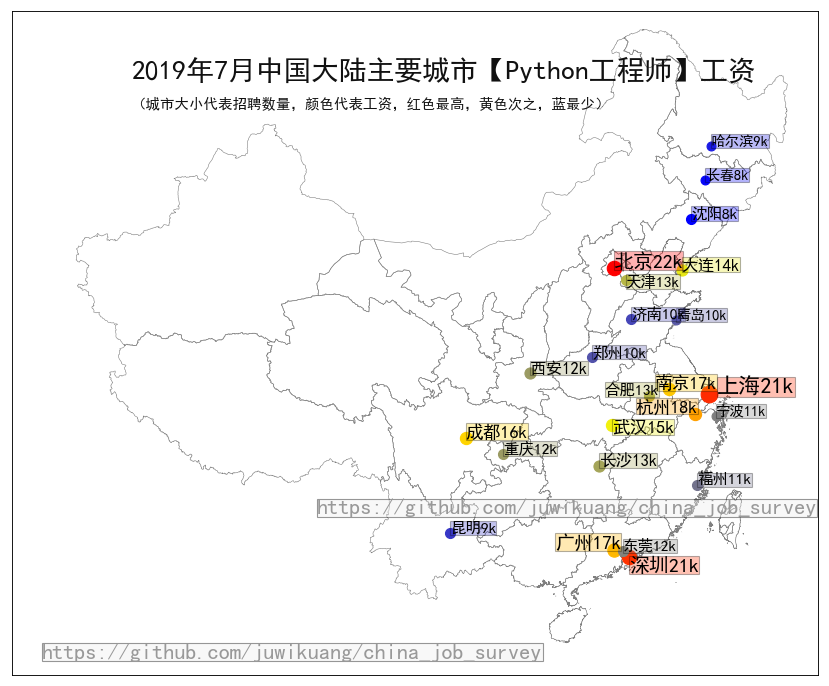

In [32]:
draw_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')